# Research question 2

Given a pageload, prediction if it has a click on the references. Section 5.1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.5f' % x)

### Pageloads matched by user. Only 1 pair per user:

In [2]:
features = pd.read_json("page_level_analysis_features_usermatched_nodup.json.gz", lines=True)
features.head()

,Assistance-Article_improvement_and_grading,Assistance-Contents_systems,Assistance-Files,Assistance-Maintenance,Culture-Arts,Culture-Broadcasting,Culture-Crafts_and_hobbies,Culture-Entertainment,Culture-Food_and_drink,Culture-Internet_culture,...,STEM-Physics,STEM-Science,STEM-Space,STEM-Technology,STEM-Time,has_clicks,hour,is_desktop,references_count,text_length
0,0.00010,0.00338,0.00206,0.13867,0.00047,0.00189,0.00732,0.07224,0.00813,0.99734,...,0.00267,0.00519,0.00056,0.28141,0.00194,1,1,1,59,13997
1,0.00000,0.01064,0.00037,0.02305,0.00021,0.00096,0.00263,0.00240,0.00316,0.00063,...,0.00121,0.00904,0.00027,0.02904,0.00257,1,17,1,2,867
2,0.00006,0.00224,0.00207,0.04405,0.97234,0.00103,0.01277,0.01603,0.00219,0.00160,...,0.00050,0.00721,0.00014,0.00707,0.00135,0,20,0,8,3902
3,0.00000,0.02672,0.00012,0.03878,0.00076,0.00244,0.01001,0.00165,0.00132,0.00097,...,0.00060,0.00086,0.00033,0.01120,0.01578,0,14,1,2,1944
4,0.00003,0.00540,0.00077,0.04036,0.00036,0.00710,0.00624,0.01225,0.00308,0.00146,...,0.00194,0.00189,0.00096,0.00578,0.00410,0,9,1,2,1879


In [3]:
features.columns

Index([u'Assistance-Article_improvement_and_grading',
       u'Assistance-Contents_systems', u'Assistance-Files',
       u'Assistance-Maintenance', u'Culture-Arts', u'Culture-Broadcasting',
       u'Culture-Crafts_and_hobbies', u'Culture-Entertainment',
       u'Culture-Food_and_drink', u'Culture-Internet_culture',
       u'Culture-Language_and_literature', u'Culture-Media',
       u'Culture-Performing_arts', u'Culture-Philosophy_and_religion',
       u'Culture-Plastic_arts', u'Culture-Sports', u'Culture-Visual_arts',
       u'Geography-Bodies_of_water', u'Geography-Cities',
       u'Geography-Countries', u'Geography-Europe', u'Geography-Landforms',
       u'Geography-Maps', u'Geography-Oceania',
       u'History_And_Society-Business_and_economics',
       u'History_And_Society-Education',
       u'History_And_Society-History_and_society',
       u'History_And_Society-Military_and_warfare',
       u'History_And_Society-Politics_and_government',
       u'History_And_Society-Transportati

Apply log transformations and normalization:

In [3]:
import math
y = features['has_clicks']
X = features.drop('has_clicks', axis=1)

X["references_count"] = X["references_count"].apply(lambda v: math.log(v))
X["text_length"] = X["text_length"].apply(lambda v: math.log(v))

X["hour"] = X["hour"]/X["hour"].max()
X["references_count"] = X["references_count"]/X["references_count"].max()
X["text_length"] = X["text_length"]/X["text_length"].max()

X.describe()

,Assistance-Article_improvement_and_grading,Assistance-Contents_systems,Assistance-Files,Assistance-Maintenance,Culture-Arts,Culture-Broadcasting,Culture-Crafts_and_hobbies,Culture-Entertainment,Culture-Food_and_drink,Culture-Internet_culture,...,STEM-Meteorology,STEM-Physics,STEM-Science,STEM-Space,STEM-Technology,STEM-Time,hour,is_desktop,references_count,text_length
count,1879437.00000,1879437.00000,1879437.00000,1879437.00000,1879437.00000,1879437.00000,1879437.00000,1879437.00000,1879437.00000,1879437.00000,...,1879437.00000,1879437.00000,1879437.00000,1879437.00000,1879437.00000,1879437.00000,1879437.00000,1879437.00000,1879437.00000,1879437.00000
mean,0.00021,0.00610,0.00226,0.06871,0.00458,0.07613,0.00879,0.11933,0.02033,0.04978,...,0.00363,0.01479,0.01495,0.00865,0.05406,0.00930,0.53713,0.64928,0.37949,0.68405
std,0.01158,0.01575,0.00999,0.04768,0.03873,0.20336,0.04160,0.24677,0.11057,0.14017,...,0.04249,0.08570,0.05229,0.07933,0.14997,0.02471,0.30071,0.47720,0.16689,0.09310
min,0.00000,0.00032,0.00000,0.00414,0.00002,0.00002,0.00004,0.00030,0.00006,0.00004,...,0.00003,0.00019,0.00021,0.00002,0.00044,0.00010,0.00000,0.00000,0.08950,0.29874
25%,0.00002,0.00220,0.00070,0.03613,0.00037,0.00247,0.00146,0.00430,0.00146,0.00126,...,0.00032,0.00077,0.00179,0.00028,0.00468,0.00217,0.26087,0.00000,0.25125,0.61836
50%,0.00003,0.00349,0.00135,0.05587,0.00065,0.00556,0.00281,0.01157,0.00271,0.00410,...,0.00055,0.00122,0.00347,0.00048,0.00896,0.00443,0.56522,1.00000,0.36581,0.68530
75%,0.00006,0.00607,0.00263,0.08729,0.00135,0.01979,0.00596,0.05723,0.00548,0.02146,...,0.00104,0.00243,0.00885,0.00096,0.02270,0.00952,0.78261,1.00000,0.49983,0.75266
max,1.00000,1.00000,1.00000,0.98919,0.99999,1.00000,0.99999,0.99989,1.00000,0.99998,...,1.00000,0.99997,0.99774,1.00000,0.99651,1.00000,1.00000,1.00000,1.00000,1.00000


# Correlation between all features

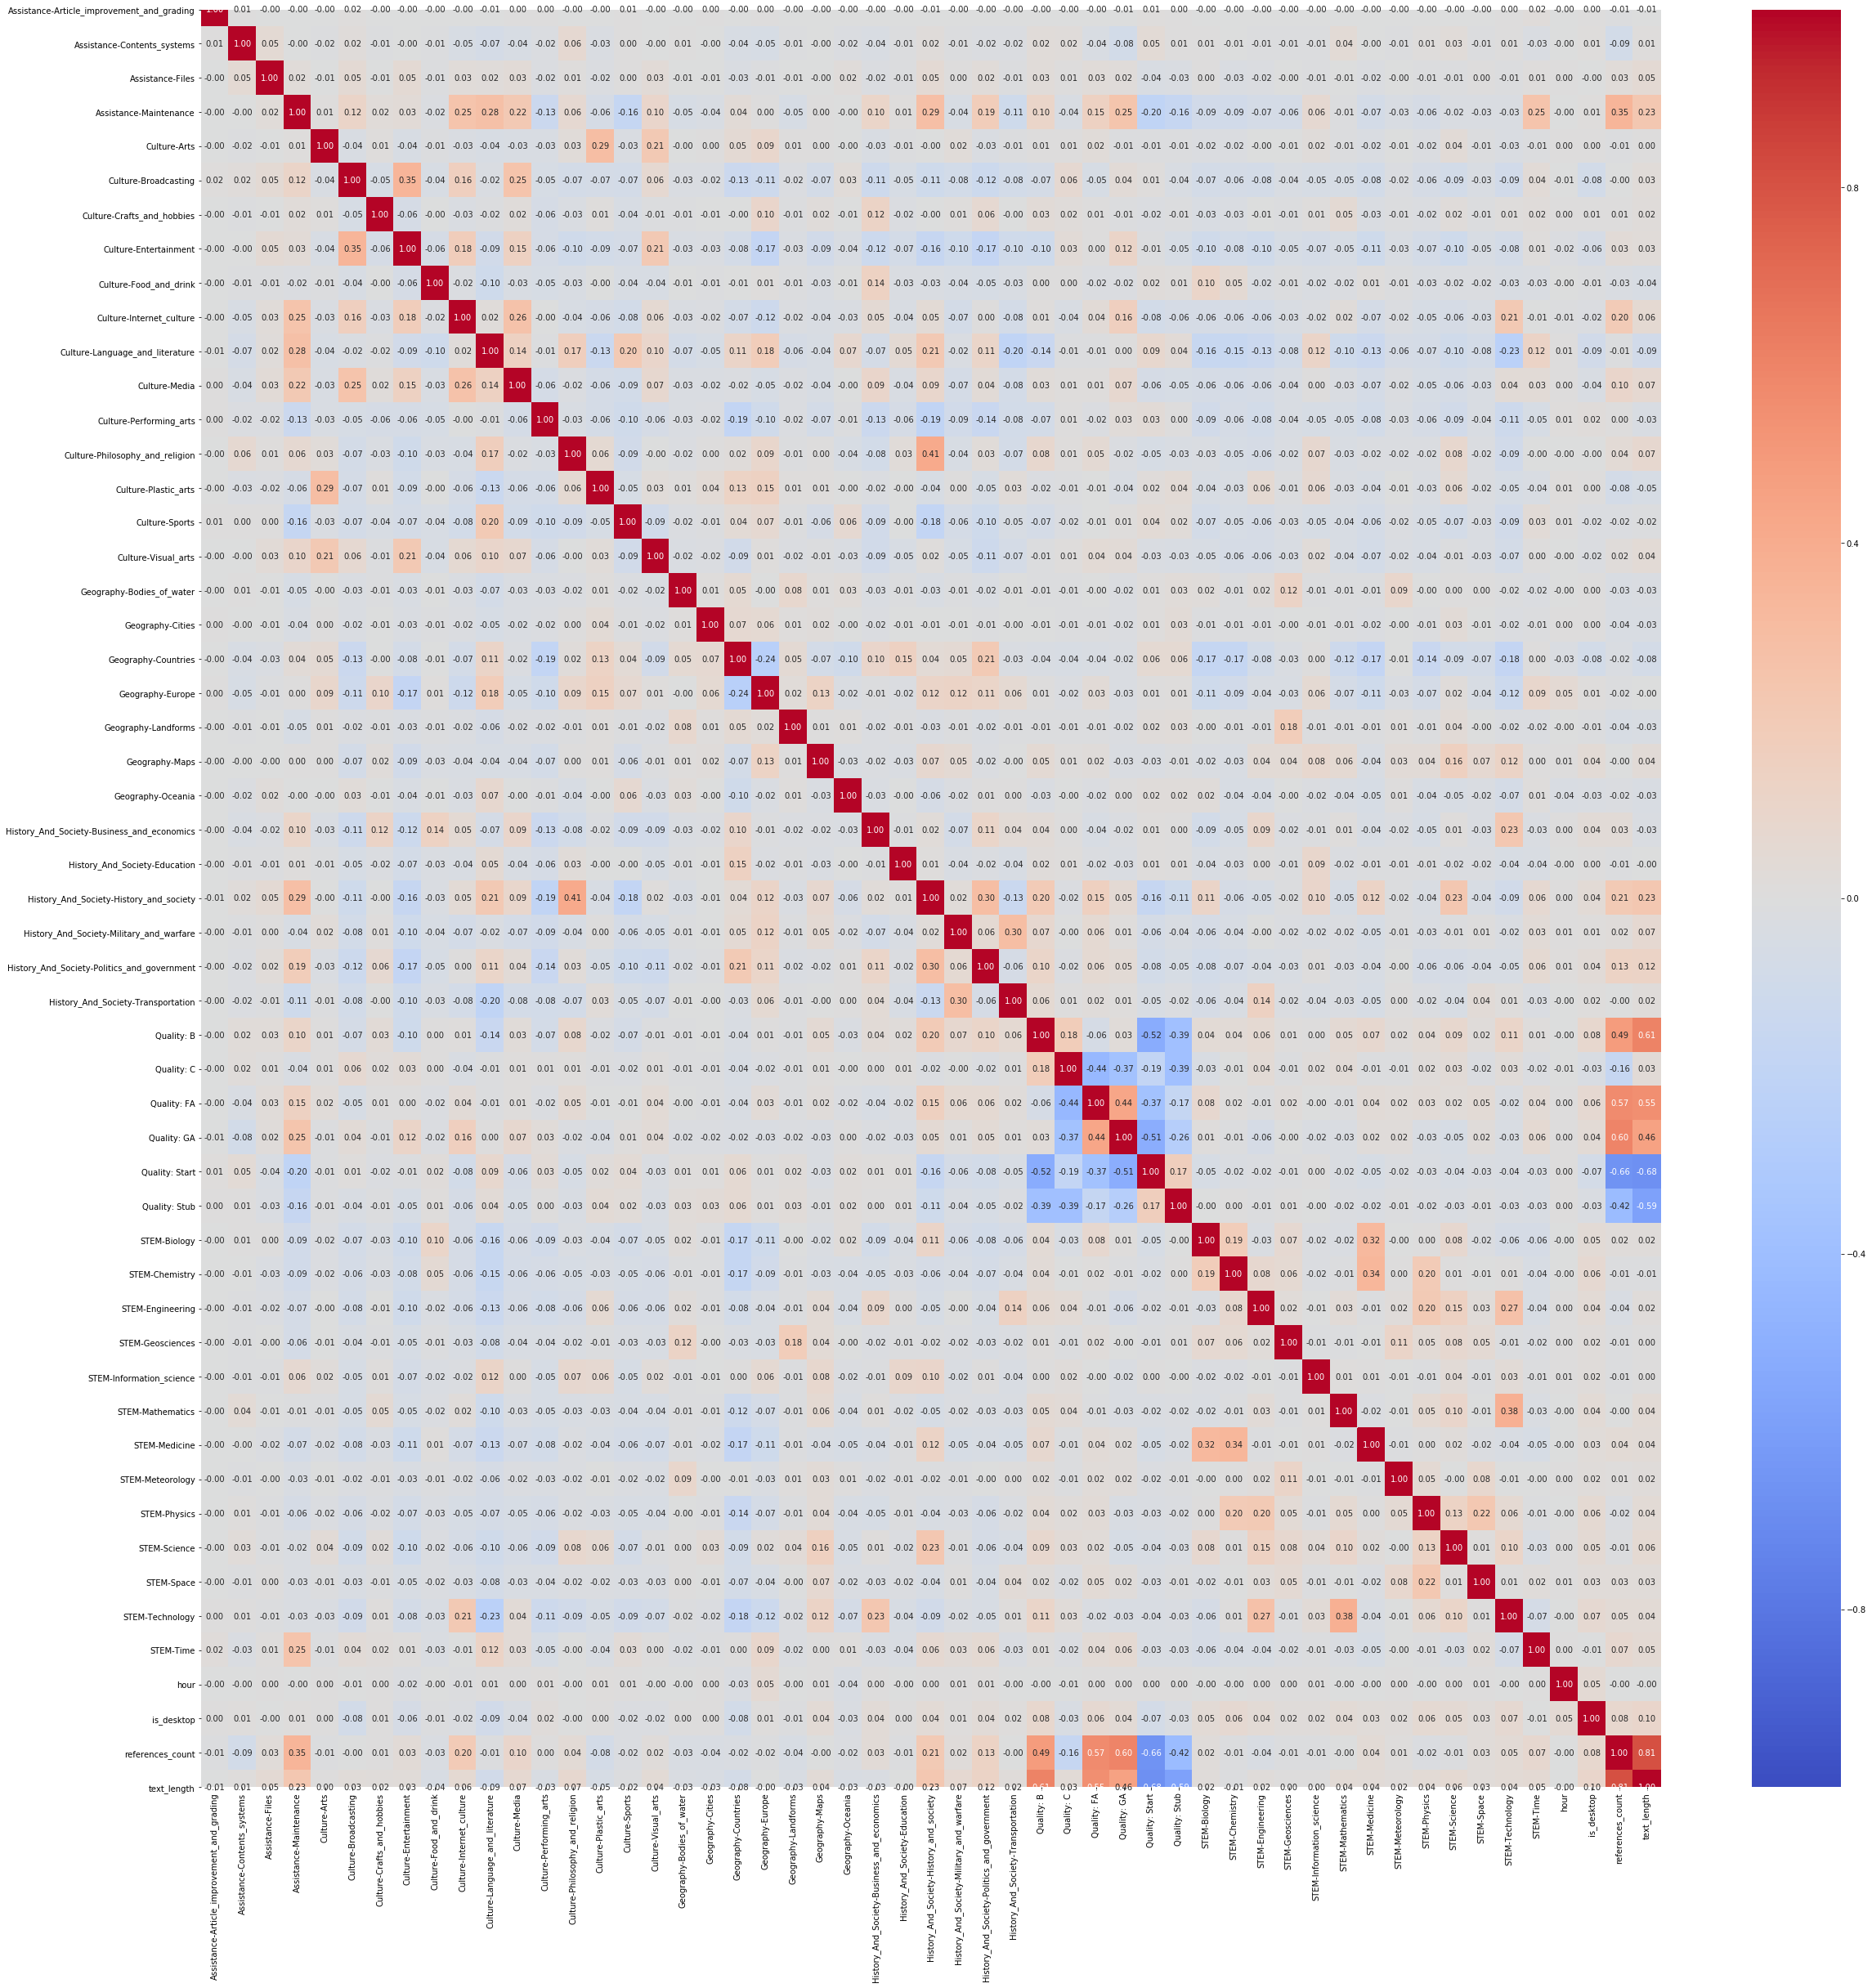

In [4]:
tmp = X.sample(100000)

plt.figure(figsize=(40,40))
p = sns.heatmap(tmp.corr(),
            vmin=-1,
            cmap='coolwarm',
            fmt=".2f",
            annot=True)


### Transform quality in continuos form:

In [5]:
quality_df = X[['Quality: B', 'Quality: C', 'Quality: FA', 'Quality: GA', 'Quality: Start', 'Quality: Stub']]

quality_map = {
    'Quality: Stub': 0,
    'Quality: Start': 0.2,
    'Quality: B': 0.6,
    'Quality: C': 0.4,
    'Quality: GA': 0.8,
    'Quality: FA': 1.0
}

def get_quality(row):
#     print(row.to_dict())
    top_quality = sorted([(k,v) for k,v in row.to_dict().items()], key=lambda r: -r[1])[0]
    return quality_map[top_quality[0]]

X['quality'] = quality_df.apply(lambda r: get_quality(r), axis=1)

### Drop features: quality (already converted, Assistance topics)

In [6]:
X = X.drop('Quality: B', axis=1).drop('Quality: C', axis=1).drop('Quality: FA', axis=1).drop('Quality: GA', axis=1)\
        .drop('Quality: Start', axis=1).drop('Quality: Stub', axis=1)\
        .drop('Assistance-Article_improvement_and_grading', axis=1).drop('Assistance-Contents_systems', axis=1)\
        .drop('Assistance-Maintenance', axis=1).drop('Assistance-Files', axis=1).drop('hour', axis=1)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])
X.head(5)

,Culture-Arts,Culture-Broadcasting,Culture-Crafts_and_hobbies,Culture-Entertainment,Culture-Food_and_drink,Culture-Internet_culture,Culture-Language_and_literature,Culture-Media,Culture-Performing_arts,Culture-Philosophy_and_religion,...,STEM-Meteorology,STEM-Physics,STEM-Science,STEM-Space,STEM-Technology,STEM-Time,is_desktop,references_count,text_length,quality
0,-0.10622,-0.36507,-0.03532,-0.19080,-0.11035,6.75990,0.88540,1.50362,-0.33749,-0.13556,...,-0.07406,-0.14148,-0.18655,-0.10195,1.51595,-0.29793,0.73496,0.88071,0.48310,1.38747
1,-0.11306,-0.36968,-0.14826,-0.47383,-0.15533,-0.35060,-0.97643,-0.37067,-0.35351,-0.32916,...,-0.06196,-0.15842,-0.11303,-0.10565,-0.16683,-0.27256,0.73496,-1.73762,-1.79848,-1.81502
2,24.98539,-0.36933,0.09549,-0.41859,-0.16413,-0.34370,-0.96953,-0.36528,-0.34984,-0.31407,...,-0.08177,-0.16671,-0.14792,-0.10730,-0.31335,-0.32162,-1.36062,-0.66511,-0.56465,-0.21377
3,-0.09869,-0.36237,0.02917,-0.47686,-0.17198,-0.34821,0.62430,-0.36984,-0.35144,-0.32844,...,-0.03281,-0.16561,-0.26936,-0.10485,-0.28582,0.26208,0.73496,-1.73762,-1.13615,-1.81502
4,-0.10913,-0.33947,-0.06147,-0.43392,-0.15605,-0.34474,2.09708,-0.27114,2.81838,-0.17499,...,-0.07478,-0.14997,-0.24965,-0.09693,-0.32192,-0.21047,0.73496,-1.73762,-1.16405,-1.81502


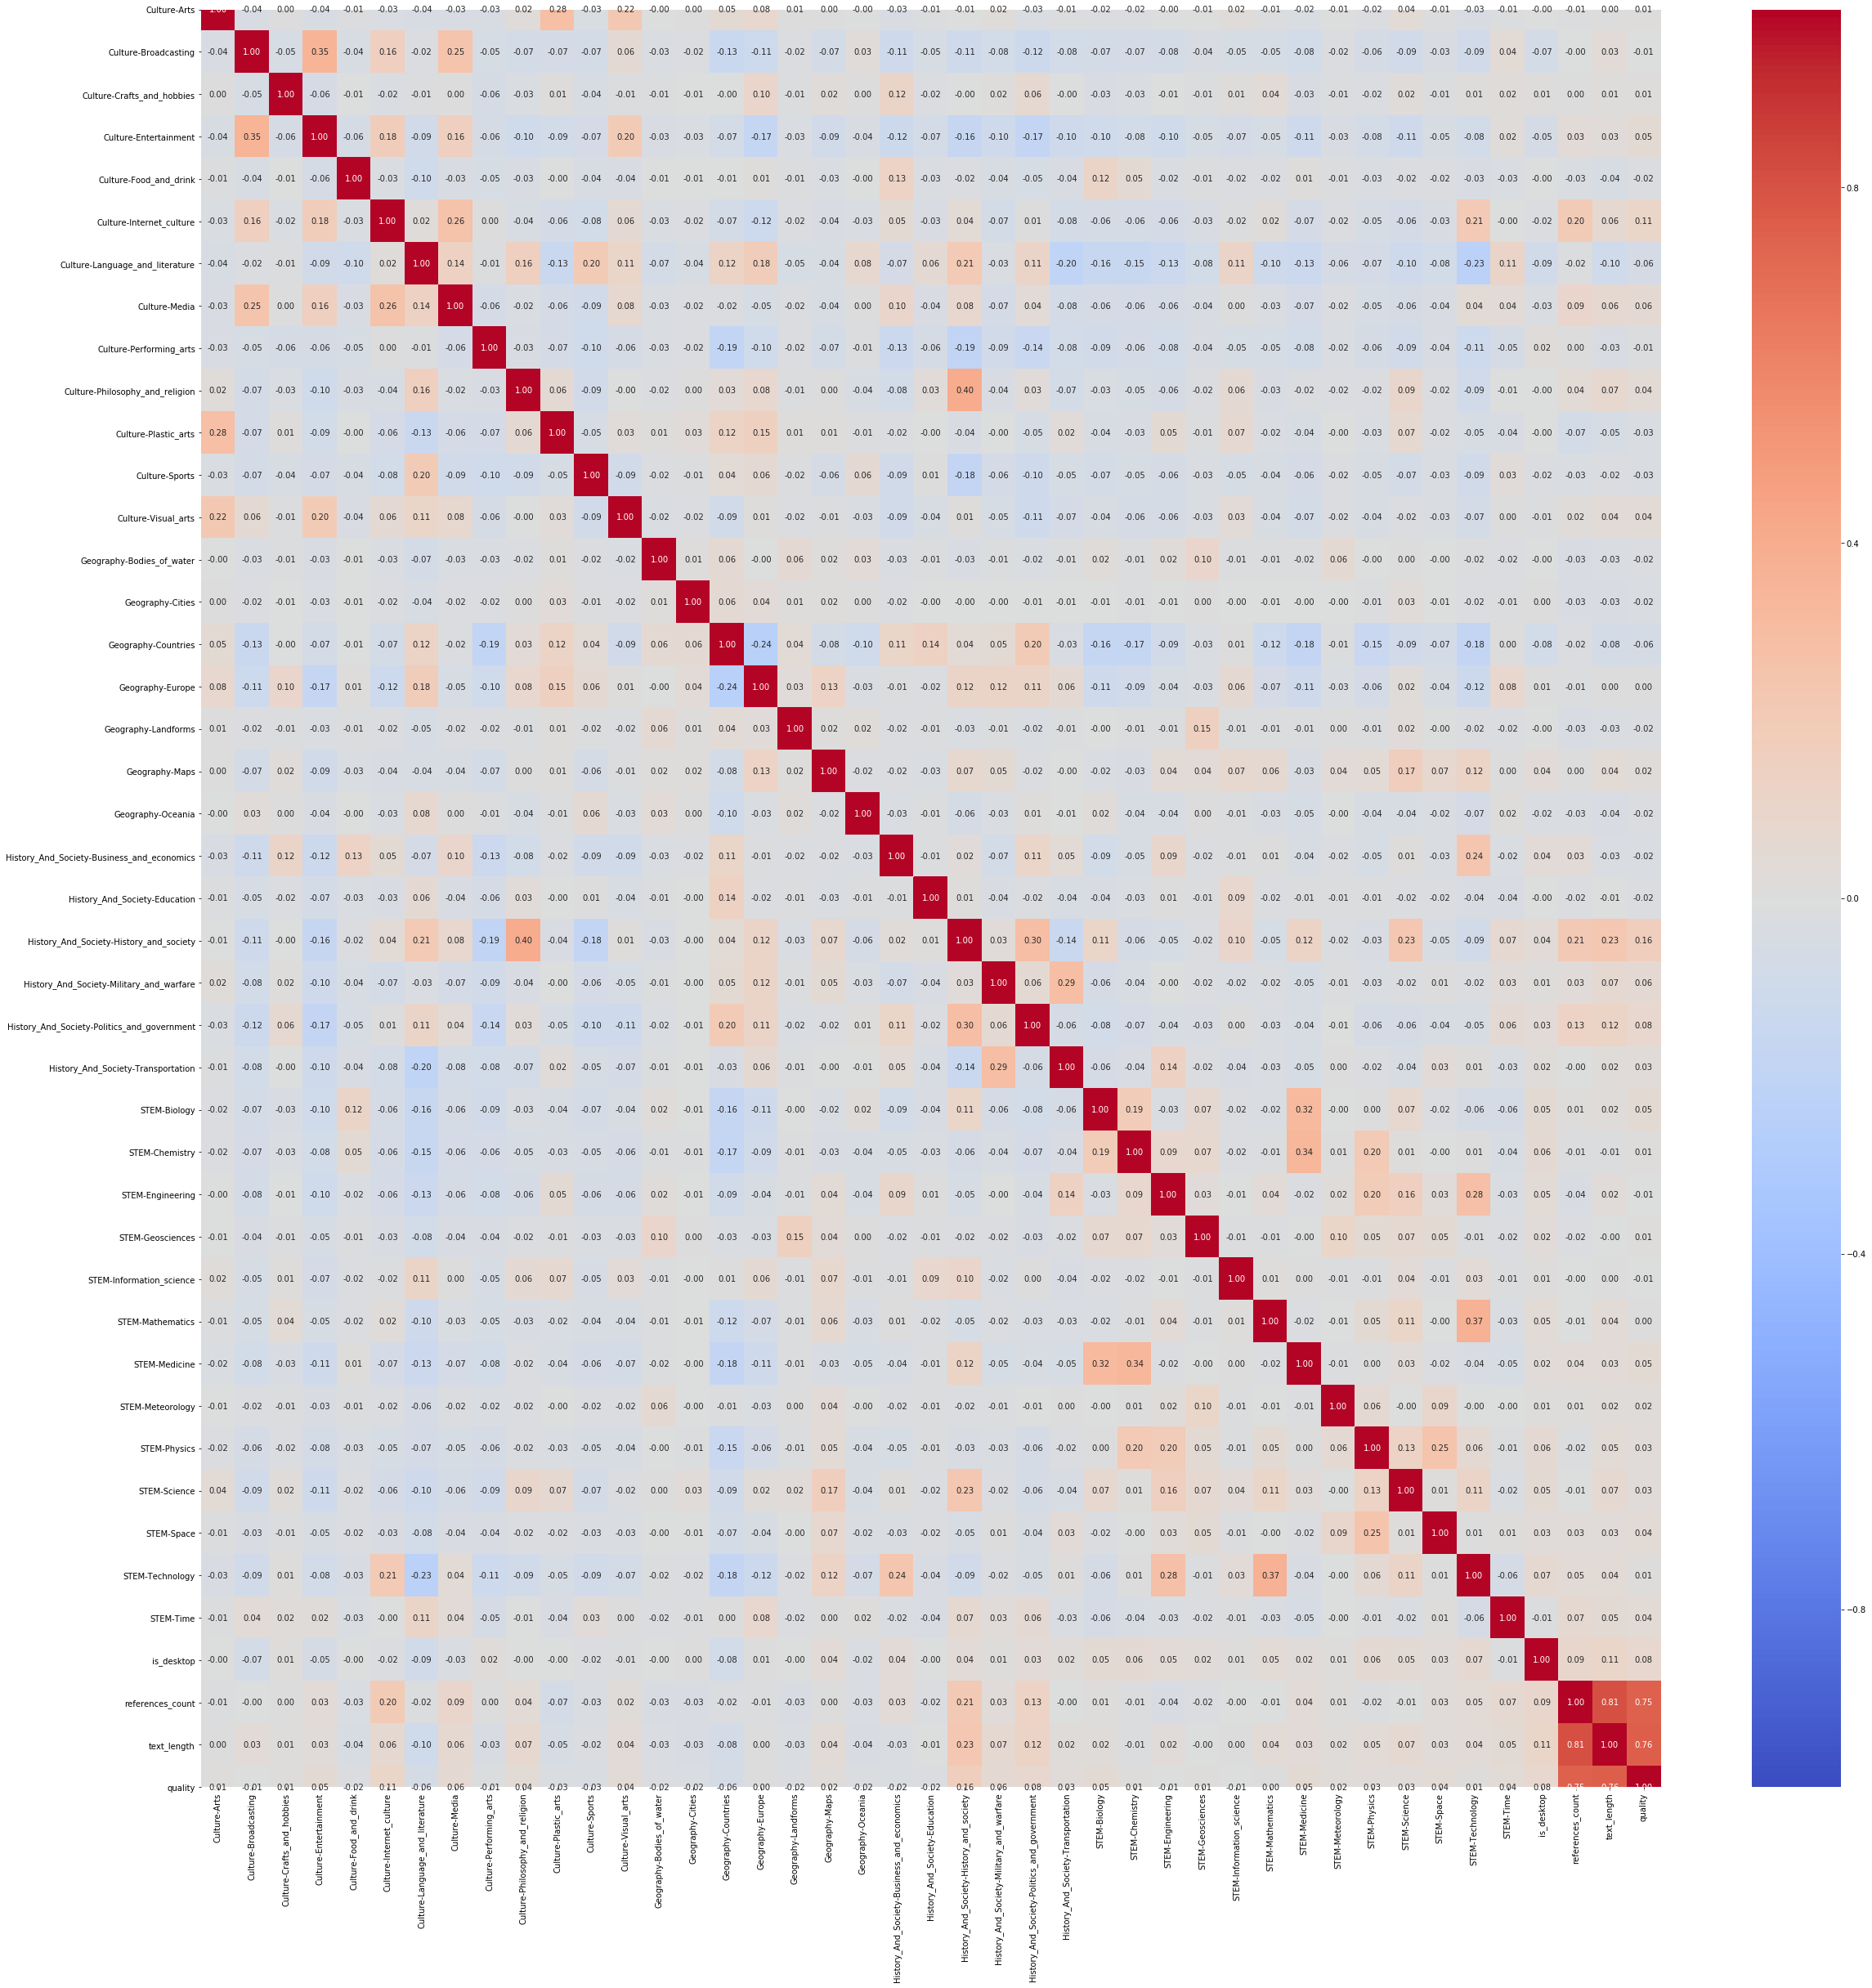

In [12]:
tmp = X.sample(100000)

plt.figure(figsize=(40,40))
p = sns.heatmap(tmp.corr(),
            vmin=-1,
            cmap='coolwarm',
            fmt=".2f",
            annot=True)

Optimization terminated successfully.
         Current function value: 0.679113
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             has_clicks   No. Observations:              1879437
Model:                          Logit   Df Residuals:                  1879397
Method:                           MLE   Df Model:                           39
Date:                Thu, 03 Oct 2019   Pseudo R-squ.:                 0.02024
Time:                        16:13:31   Log-Likelihood:            -1.2764e+06
converged:                       True   LL-Null:                   -1.3027e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Culture-Arts                              

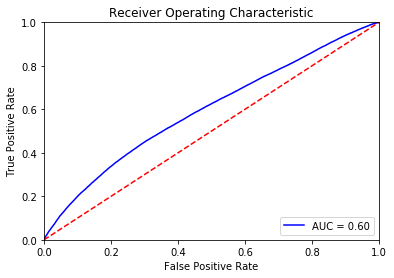

In [13]:
import statsmodels.api as sm

# discard features with high correlation with quality
X_final = X.drop("references_count", axis=1).drop("text_length", axis=1).drop("is_desktop", axis=1)

logit = sm.Logit(y, X_final)
result = logit.fit()

print(result.summary())

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.1, random_state=42)
logit = sm.Logit(y_train, X_train)
result = logit.fit()

y_pred = result.predict(X_test)

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

([<matplotlib.axis.XTick at 0x7f64d51aed30>,
 <a list of 40 Text xticklabel objects>)

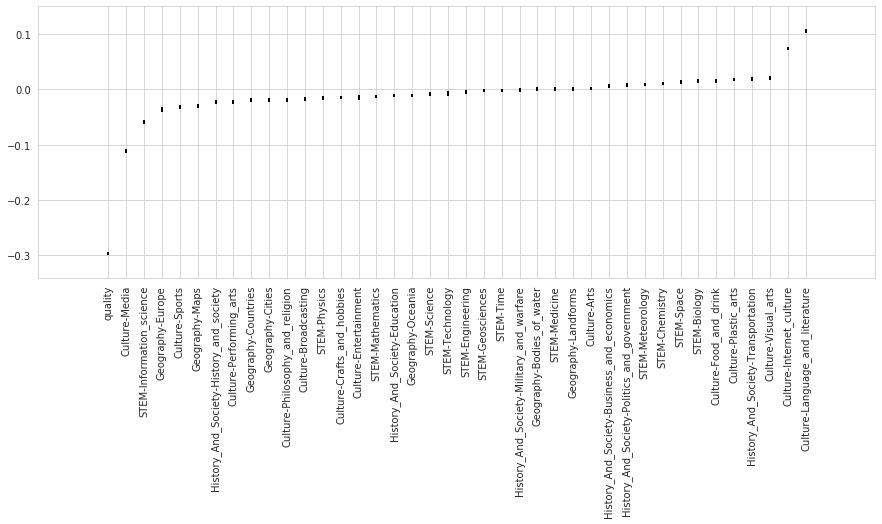

In [15]:
from matplotlib import collections  as mc

ci = result.conf_int().reset_index()
ci.columns = ['feature', 'left', 'right']

ci['coeff'] = result.params.reset_index()[0]

ci = ci.sort_values("coeff").reset_index(drop=True)
ci.head()

sns.set_style("whitegrid")

lines = []
ticks = []
for i, row in ci.iterrows():
    lines.append([(i, row['left']), (i, row['right'])])
    ticks.append(i)
    
lc = mc.LineCollection(lines, linewidths=2, color="black")
fig, ax = plt.subplots(figsize=(15,5))
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)
ax.set_xticklabels(ci.feature, rotation='vertical')
plt.xticks(ticks)
# plt.tight_layout()

# fig.savefig("features_importance_ci.pdf",bbox_inches='tight')